In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import util.methods as m
import util.statistics as s
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

Populating the interactive namespace from numpy and matplotlib


['GOOG', 'AAPL', 'GLD', 'XOM']


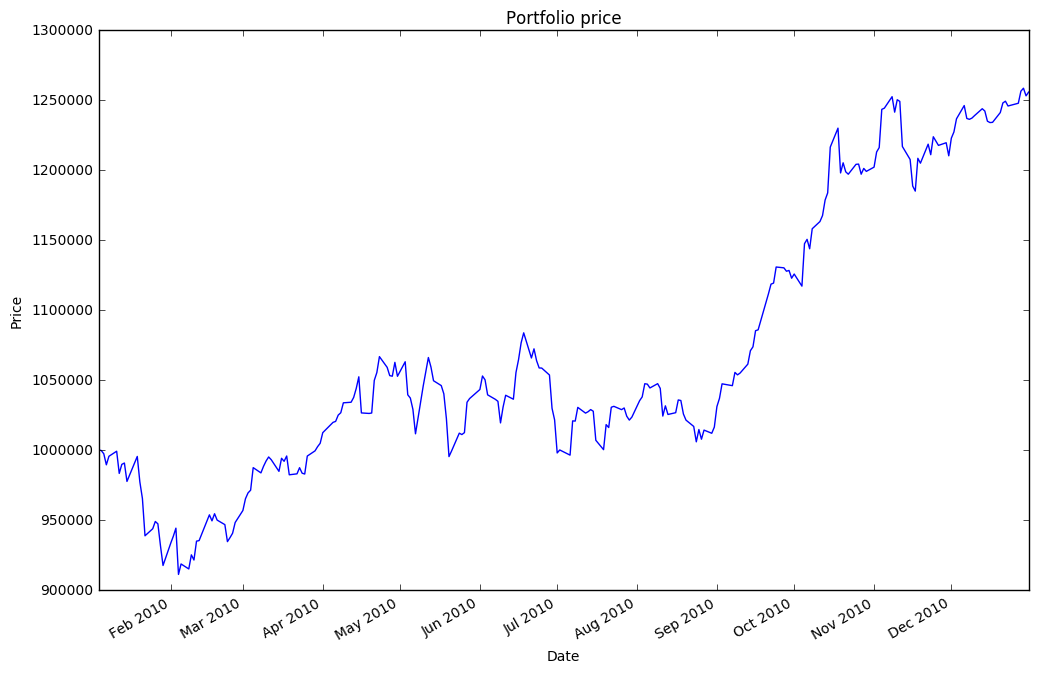

In [5]:
dates = pd.date_range('2010-01-01', '2010-12-31')
symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
start_volume = 1000000 #$
allocs = [0.2, 0.3, 0.4, 0.1]
prices = m.get_data(symbols, dates, False).dropna()
normed = m.normalize_data(prices)
alloced = normed * allocs
pos_vals = alloced * start_volume
port_val = pos_vals.sum(axis=1)

m.plot_data(port_val, 'Portfolio price')

In [6]:
#Statistics
daily_rets = s.daily_returns_simple(port_val)[1:]
cum_ret = port_val[-1] / port_val[0] - 1
print("Cumulative ret = {}".format(cum_ret))
avg_daily_ret = daily_rets.mean()
print("Avg Daily ret = {}".format(avg_daily_ret))
std_daily_ret = daily_rets.std()
print("Risk = {}".format(std_daily_ret))
daily_risk_free_rate = 0
sharpe_ratio = s.sharpe_ratio_dayily(daily_rets, daily_risk_free_rate)
print("Sharpe ratio = {}".format(sharpe_ratio))

Cumulative ret = 0.25566074887951085
Avg Daily ret = 0.000957409793387259
Risk = 0.010010346058303803
Sharpe ratio = 1.5182701185315268


In [57]:
def assess_portfolio(sd='2008-1-1', ed='2009-1-1', \
    symbols=['GOOG','AAPL','GLD','XOM'], \
    allocs=[0.1,0.2,0.3,0.4], \
    start_volume=1000000, \
    rfr=0.0, \
                     #risk free rate
    sf=252.0, \
                     # Sampling frequency
    gen_plot=False):
    
    dates = pd.date_range(sd, ed)
    prices = m.fill_missing_values(m.get_data(symbols, dates, False))
    normed = m.normalize_data(prices)
    alloced = normed * allocs
    pos_vals = alloced * start_volume
    port_val = pos_vals.sum(axis=1)
    if gen_plot:
        ax = m.normalize_data(port_val).plot(title='Portfolio vs. S&P500 normed', color='g', label='Portfolio')
        SPY = m.fill_missing_values(m.get_data(['SPY'], dates, False))
        SPY_normed = m.normalize_data(SPY).plot(label='SPY', color='b', ax = ax)
        ax.legend(loc='upper left')
    
    #Statistics
    daily_rets = s.daily_returns_simple(port_val)[1:]
    cum_ret = port_val[-1] / port_val[0] - 1
    print("Cumulative ret = {}".format(cum_ret))
    avg_daily_ret = daily_rets.mean()
    print("Avg Daily ret = {}".format(avg_daily_ret))
    std_daily_ret = daily_rets.std()
    print("Risk = {}".format(std_daily_ret))
    daily_rfr = (1.0 + rfr)**(1/sf) - 1
    k = sf ** (1/2) # sqrt
    sharpe_ratio = k * ((daily_rets - daily_rfr).mean() / std_daily_ret)
    print("Sharpe ratio = {}".format(sharpe_ratio))
    
    end_value = port_val[-1]
    print("End value = {}".format(end_value))
        
    return cum_ret, avg_daily_ret, std_daily_ret, sharpe_ratio, end_value

['GOOG', 'AAPL', 'GLD', 'XOM']
['SPY']
Cumulative ret = 0.1284755086325462
Avg Daily ret = 0.00034827702713537324
Risk = 0.006010335628179502
Sharpe ratio = 0.9198698290692915
End value = 11284.755086325462


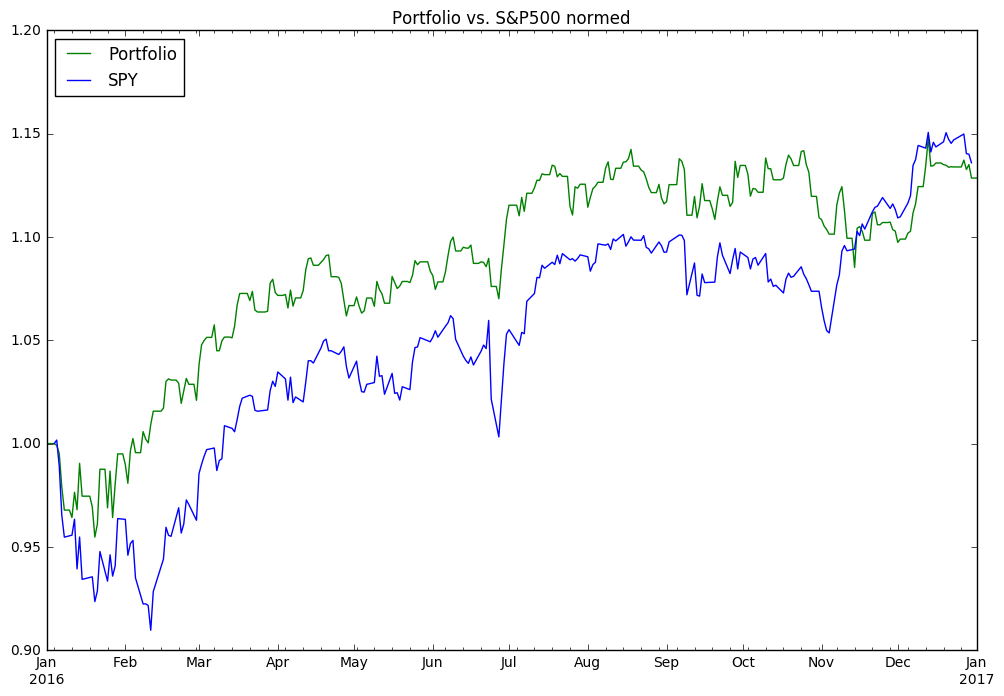

In [58]:
cum_ret, avg_daily_ret, std_daily_ret, sharpe_ratio, end_value =\
assess_portfolio('2016-01-01', '2017-01-01', \
                 ['GOOG','AAPL','GLD','XOM'], \
                 [0.2, 0.2, 0.2, 0.4], \
                 start_volume=10000, \
                 gen_plot=True)